## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from download import get_full_dataframe, main
import pandas as pd

In [23]:
main()

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:10<00:00,  2.89it/s]


In [85]:
df = pd.read_csv('data.csv', index_col=0)

df['Проголосовали'] = df['Число недействительных избирательных бюллетеней'] + df['Число действительных избирательных бюллетеней']
df['Всего'] = df['Число избирателей, внесенных в список избирателей на момент окончания голосования']

df = df[['Всего', 'Проголосовали', 'Амосов Михаил Иванович', 'Беглов Александр Дмитриевич', 'Тихонова Надежда Геннадьевна', 'ТИК']]
df

,Всего,Проголосовали,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК
УИК №1,1803,598,110,345,120,Территориальная избирательная комиссия №1
УИК №2,1466,444,53,326,46,Территориальная избирательная комиссия №1
УИК №3,2092,598,155,332,96,Территориальная избирательная комиссия №1
УИК №4,1056,322,67,171,71,Территориальная избирательная комиссия №1
УИК №5,1827,501,137,266,82,Территориальная избирательная комиссия №1
...,...,...,...,...,...,...
УИК №2350,284,219,21,184,14,Территориальная избирательная комиссия №30
УИК №2351,132,113,7,91,13,Территориальная избирательная комиссия №30
УИК №2352,320,240,20,193,23,Территориальная избирательная комиссия №30
УИК №2355,485,347,23,290,32,Территориальная избирательная комиссия №30


### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избирательный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [86]:
df

,Всего,Проголосовали,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК
УИК №1,1803,598,110,345,120,Территориальная избирательная комиссия №1
УИК №2,1466,444,53,326,46,Территориальная избирательная комиссия №1
УИК №3,2092,598,155,332,96,Территориальная избирательная комиссия №1
УИК №4,1056,322,67,171,71,Территориальная избирательная комиссия №1
УИК №5,1827,501,137,266,82,Территориальная избирательная комиссия №1
...,...,...,...,...,...,...
УИК №2350,284,219,21,184,14,Территориальная избирательная комиссия №30
УИК №2351,132,113,7,91,13,Территориальная избирательная комиссия №30
УИК №2352,320,240,20,193,23,Территориальная избирательная комиссия №30
УИК №2355,485,347,23,290,32,Территориальная избирательная комиссия №30


## Явка по ТИК:

In [87]:
turnout = {}
for name, g in df.groupby('ТИК'):
    could_vote = g['Всего'].sum()
    voted = g['Проголосовали'].sum()
    percent = round(voted / could_vote * 100, 1)
    turnout[name] = percent

turnout = pd.DataFrame(turnout.items(), columns=['ТИК', 'Явка (%)']).set_index('ТИК').sort_values('Явка (%)')[::-1]
turnout

,Явка (%)
ТИК,
Территориальная избирательная комиссия №18,50.7
Территориальная избирательная комиссия №15,40.0
Территориальная избирательная комиссия №13,39.6
Территориальная избирательная комиссия №19,37.7
Территориальная избирательная комиссия №8,36.0
Территориальная избирательная комиссия №20,33.7
Территориальная избирательная комиссия №9,33.3
Территориальная избирательная комиссия №22,32.4
Территориальная избирательная комиссия №30,32.0


## Наилучший результат, полученный Амосовым

In [89]:
by_candidate = df.copy()
by_candidate[by_candidate['Проголосовали'] <= 100] = 0
by_candidate['Амосов%'] = by_candidate['Амосов Михаил Иванович'] / by_candidate['Проголосовали']
row = by_candidate.dropna().sort_values('Амосов%')[::-1].iloc[0]
f"{row.name}: {row['Амосов%'] * 100:.2f}%"

'УИК №567: 41.52%'

## ТИК, где разница между наибольшей и наименьшей явкой максимальна

In [115]:
by_turnout = df.copy()
by_turnout['Явка'] = by_turnout['Проголосовали'] / by_turnout['Всего']

diff = {}
for name, g in by_turnout.groupby('ТИК'):
    diff[name] = g['Явка'].max() - g['Явка'].min()
    
diff = pd.DataFrame(diff, index=['Разница']).T.sort_values('Разница')[::-1]
print(f"{diff.iloc[0].name}: {diff.iloc[0]['Разница'] * 100:.2f}%")

Территориальная избирательная комиссия №17: 82.04%


## Дисперсия для каждого ТИК

In [120]:
var = {}
for name, g in by_turnout.groupby('ТИК'):
    var[name] = g['Явка'].var()
pd.DataFrame(var, index=['Дисперсия']).T

,Дисперсия
Территориальная избирательная комиссия №1,0.019176
Территориальная избирательная комиссия №10,0.007428
Территориальная избирательная комиссия №11,0.024049
Территориальная избирательная комиссия №12,0.003220
Территориальная избирательная комиссия №13,0.039352
Территориальная избирательная комиссия №14,0.003146
Территориальная избирательная комиссия №15,0.041623
Территориальная избирательная комиссия №16,0.011306
Территориальная избирательная комиссия №17,0.033070
Территориальная избирательная комиссия №18,0.024045


## Результат по каждому кандидату

In [147]:
candidates = df.copy()
candidates['Амосов результат'] = (100 * candidates['Амосов Михаил Иванович'] / candidates['Всего']).astype(int)
candidates['Беглов результат'] = (100 * candidates['Беглов Александр Дмитриевич'] / candidates['Всего']).astype(int)
candidates['Тихонова результат'] = (100 * candidates['Тихонова Надежда Геннадьевна'] / candidates['Всего']).astype(int)


def get_result_by_candidate(name):
    return candidates[name].sum() / candidates['Проголосовали'].sum()

final = {
    'Амосов Михаил Иванович': get_result_by_candidate('Амосов Михаил Иванович'),
    'Беглов Александр Дмитриевич': get_result_by_candidate('Беглов Александр Дмитриевич'),
    'Тихонова Надежда Геннадьевна': get_result_by_candidate('Тихонова Надежда Геннадьевна')
}


result = pd.DataFrame(final, index=['Результат']).T



amosov = len(candidates[candidates['Амосов результат'] >= result.loc['Амосов Михаил Иванович'][0]])
beglov = len(candidates[candidates['Беглов результат'] >= result.loc['Беглов Александр Дмитриевич'][0]])
tihonova = len(candidates[candidates['Тихонова результат'] >= result.loc['Тихонова Надежда Геннадьевна'][0]])
    
amosov, beglov, tihonova

(2014, 2021, 2014)

## Графики

In [151]:
by_turnout['Амосов Михаил Иванович'] /= by_turnout['Проголосовали']
by_turnout['Беглов Александр Дмитриевич'] /= by_turnout['Проголосовали']
by_turnout['Тихонова Надежда Геннадьевна'] /= by_turnout['Проголосовали']

,Всего,Проголосовали,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,ТИК,Явка
УИК №1,1803,598,0.183946,0.576923,0.200669,Территориальная избирательная комиссия №1,0.331669
УИК №2,1466,444,0.119369,0.734234,0.103604,Территориальная избирательная комиссия №1,0.302865
УИК №3,2092,598,0.259197,0.555184,0.160535,Территориальная избирательная комиссия №1,0.285851
УИК №4,1056,322,0.208075,0.531056,0.220497,Территориальная избирательная комиссия №1,0.304924
УИК №5,1827,501,0.273453,0.530938,0.163673,Территориальная избирательная комиссия №1,0.274220
...,...,...,...,...,...,...,...
УИК №2350,284,219,0.095890,0.840183,0.063927,Территориальная избирательная комиссия №30,0.771127
УИК №2351,132,113,0.061947,0.805310,0.115044,Территориальная избирательная комиссия №30,0.856061
УИК №2352,320,240,0.083333,0.804167,0.095833,Территориальная избирательная комиссия №30,0.750000
УИК №2355,485,347,0.066282,0.835735,0.092219,Территориальная избирательная комиссия №30,0.715464


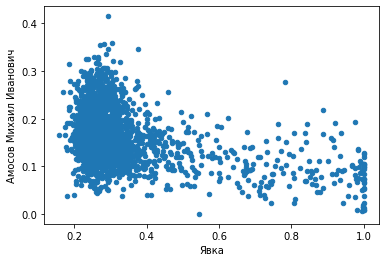

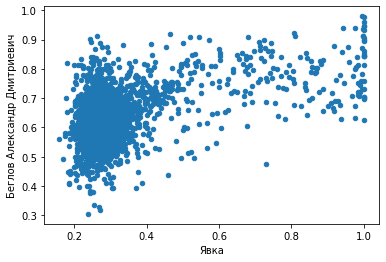

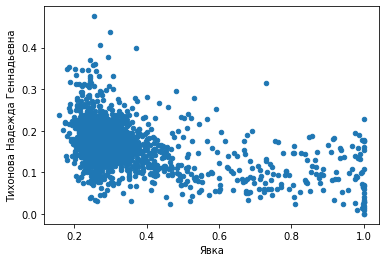

In [155]:
by_turnout.plot(kind='scatter', y='Амосов Михаил Иванович', x='Явка')
by_turnout.plot(kind='scatter', y='Беглов Александр Дмитриевич', x='Явка')
by_turnout.plot(kind='scatter', y='Тихонова Надежда Геннадьевна', x='Явка')